In [226]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [219]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plotar perda
    ax1.plot(history.history['loss'], label='Perda de treino')
    ax1.plot(history.history['val_loss'], label='Perda de validação')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Perda')
    ax1.set_title('Perda durante o Treinamento e Validação')
    ax1.legend()

    # Plotar acurácia
    ax2.plot(history.history['accuracy'], label='Acurácia de treino')
    ax2.plot(history.history['val_accuracy'], label='Acurácia de validação')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Acurácia')
    ax2.set_title('Acurácia durante o Treinamento e Validação')
    ax2.legend()

    plt.show()


In [135]:
dataset = sklearn.datasets.fetch_olivetti_faces(data_home="/home/talvani/TP-RNA/olivetti",shuffle=True)
print(dataset.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


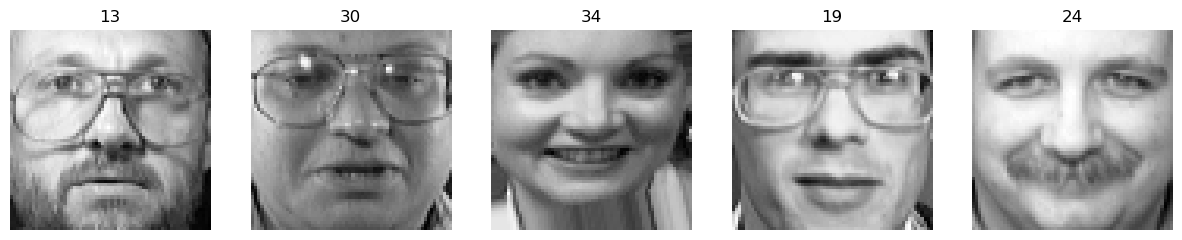

In [66]:
images = dataset.images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(dataset.target[i]))

In [262]:
x= dataset.images
y= dataset.target

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2

In [263]:
print(np.shape(x_train),np.shape(x_test),np.shape(x_val))

(240, 64, 64) (80, 64, 64) (80, 64, 64)


In [264]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(40)
])

In [265]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [266]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0127 - loss: 4.3052 - val_accuracy: 0.0500 - val_loss: 3.8697
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0406 - loss: 3.8744 - val_accuracy: 0.0500 - val_loss: 3.8916
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0304 - loss: 3.7436 - val_accuracy: 0.0125 - val_loss: 3.7892
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0838 - loss: 3.6203 - val_accuracy: 0.0375 - val_loss: 3.6046
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0757 - loss: 3.4700 - val_accuracy: 0.0625 - val_loss: 3.6154
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1641 - loss: 3.3748 - val_accuracy: 0.0625 - val_loss: 3.5873
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1683 - loss: 3.3403 - val_accuracy: 0.0750 - val_loss: 3.4707
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1663 - loss: 3.1255 - val_accuracy: 0.2000 - val_loss:

In [281]:
inferencias = model(x_test)

In [297]:
print(np.argmax(inferencias[1]))
print(inferencias[1])

26
tf.Tensor(
[ -2.6415458   -1.6345079   -3.020562    -0.8846353   -8.617855
 -12.947239    -4.2539454   -7.2505283   -9.0976305   -2.1374788
   0.6768898    1.5251448    2.3248332    6.087241    -7.988236
  -1.5577997   -3.740634   -12.660046     1.7439439   -8.787623
  -6.1693854   -8.865037    -0.48050153 -13.617449     0.37721223
   3.7876966    8.746361    -0.16098468 -14.134161   -15.567893
  -6.9328938    1.4382905  -26.028645    -9.072363   -19.783426
  -5.4523635   -5.868881   -11.018563   -11.974506    -8.114276  ], shape=(40,), dtype=float32)


In [296]:
print(y_test[1])

26


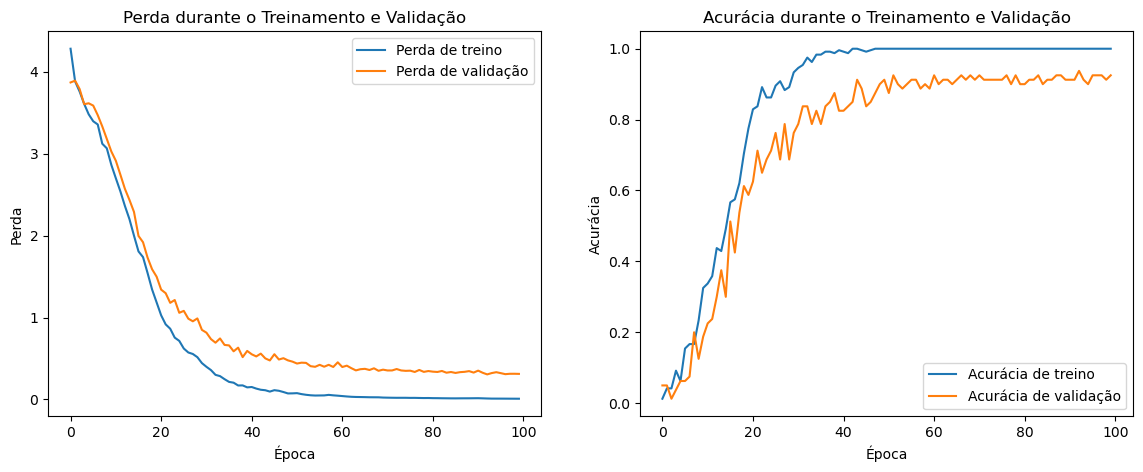

In [267]:
plot_history(history)

In [268]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


3/3 - 0s - 16ms/step - accuracy: 0.9125 - loss: 0.4925

Test accuracy: 0.9125000238418579


10
10


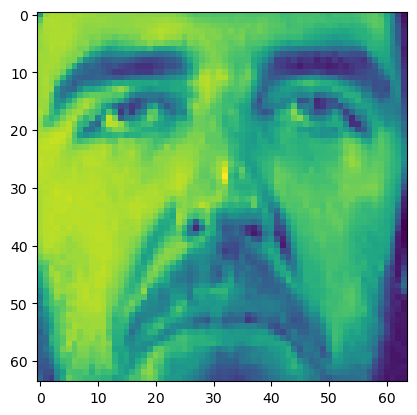

In [259]:
print(np.argmax(model(x_train)[0]))
print(y_train[0])
plt.imshow(x_train[0])

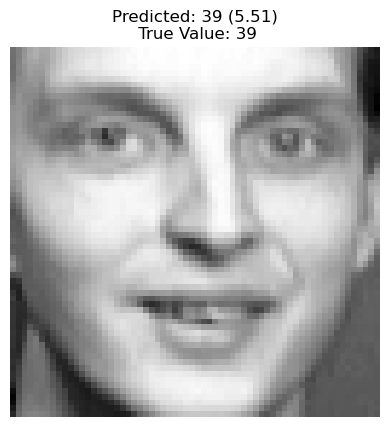

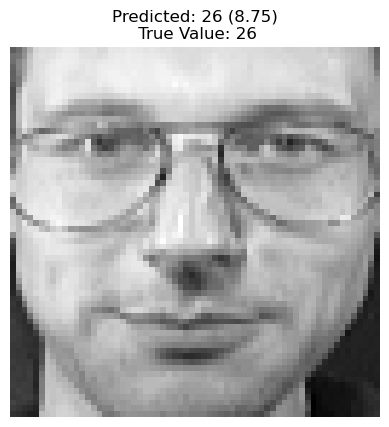

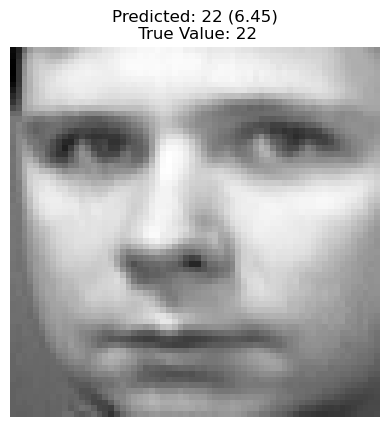

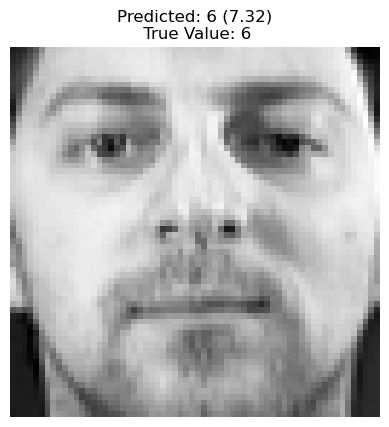

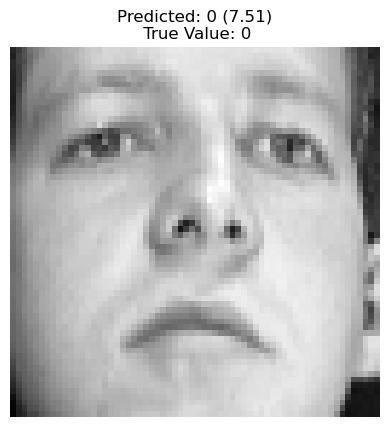

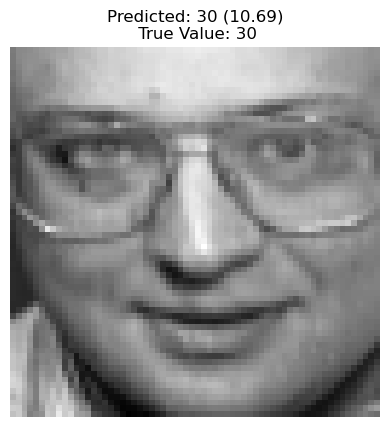

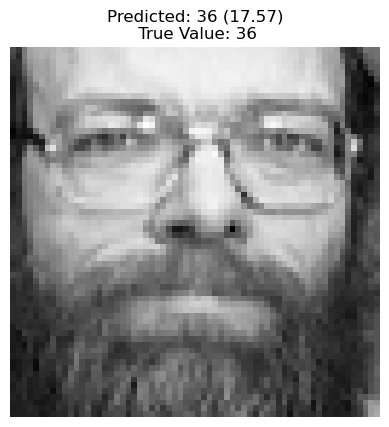

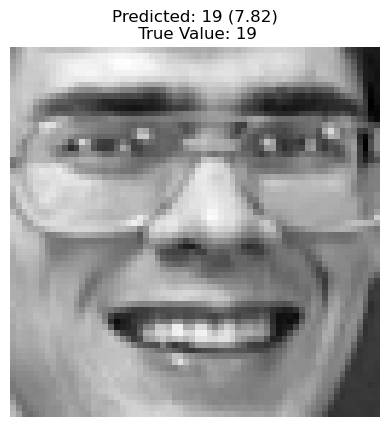

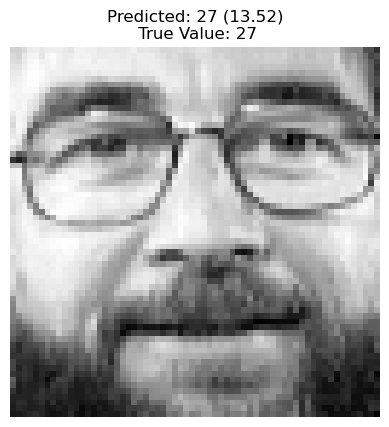

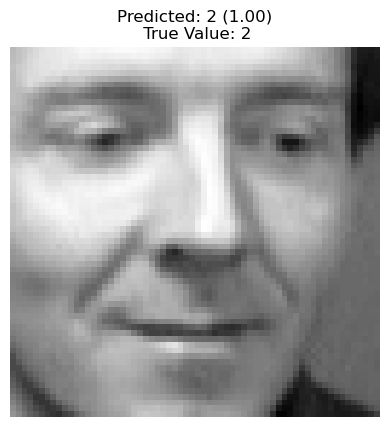

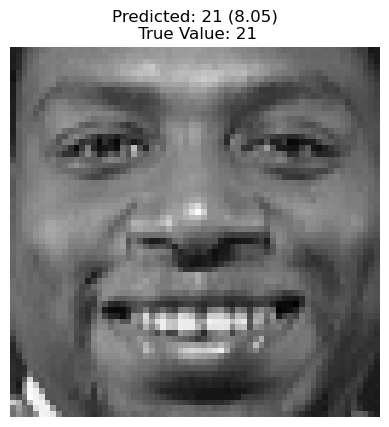

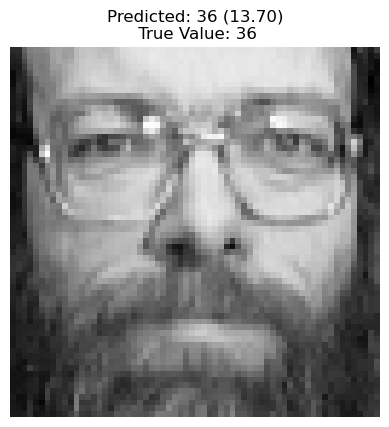

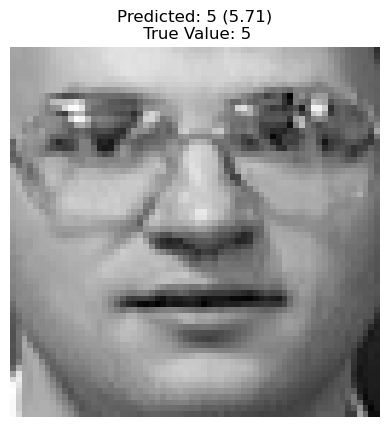

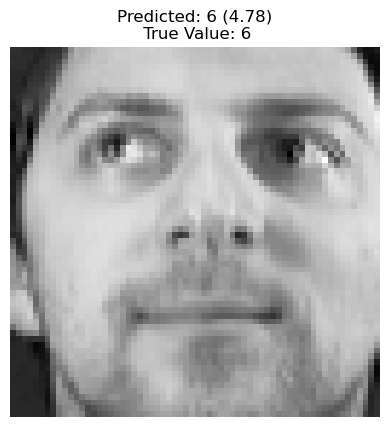

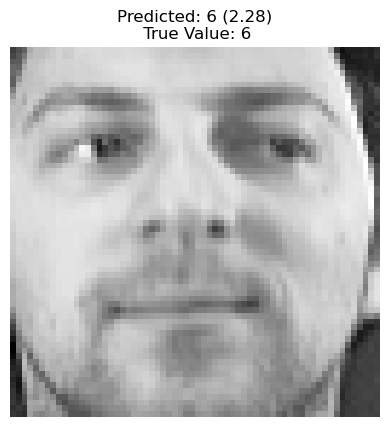

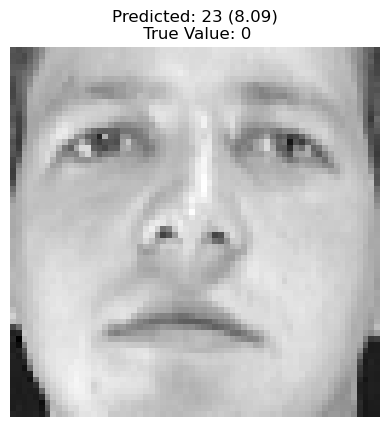

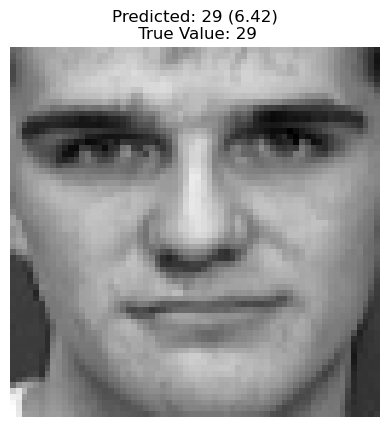

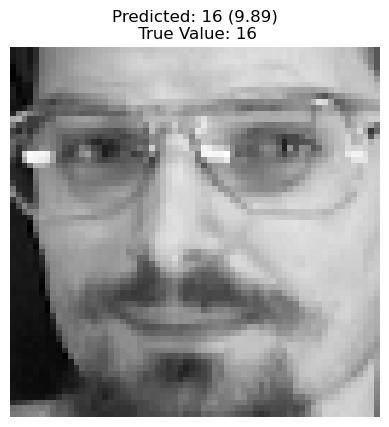

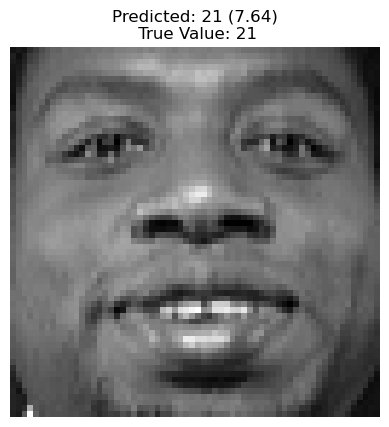

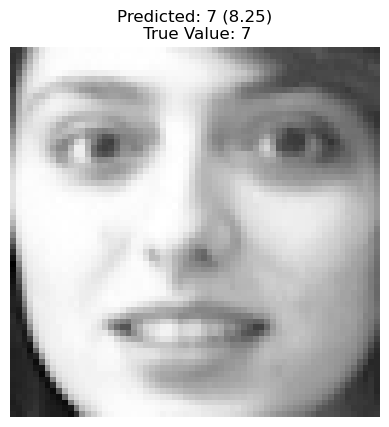

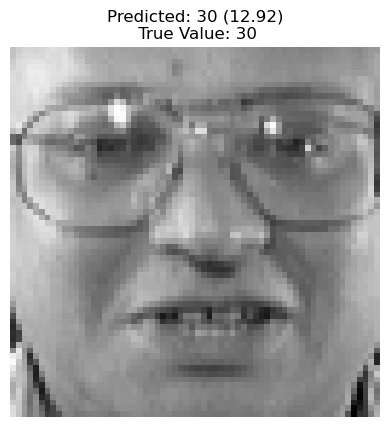

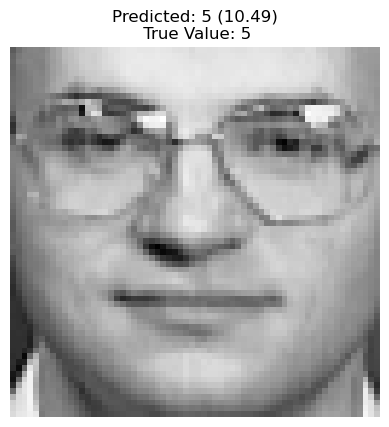

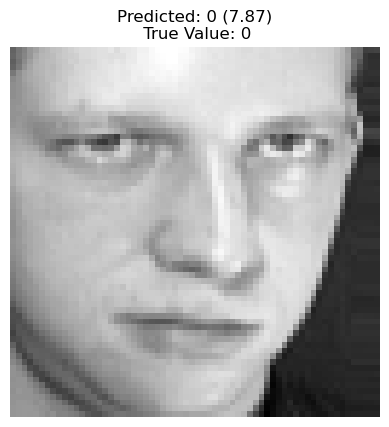

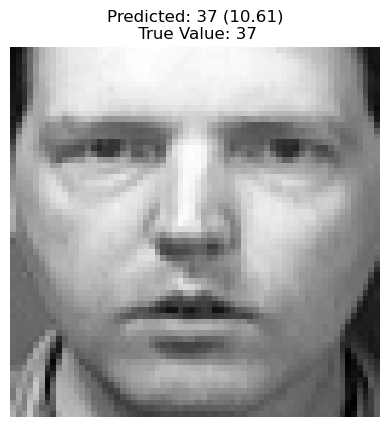

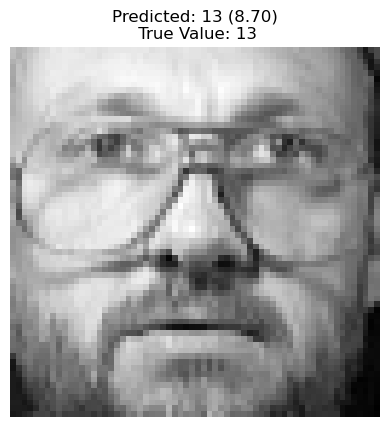

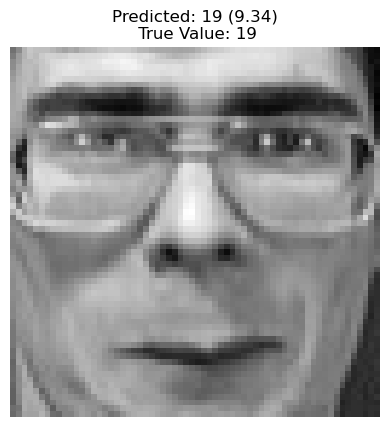

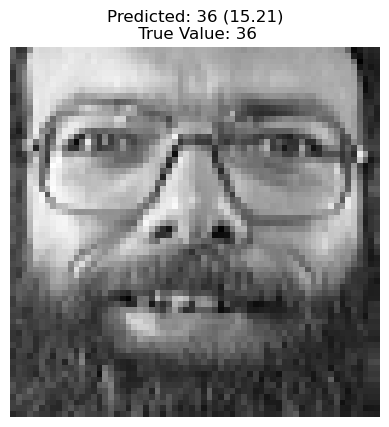

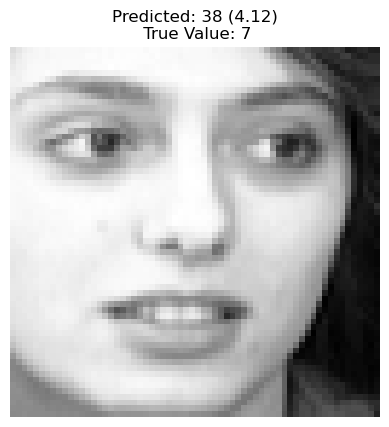

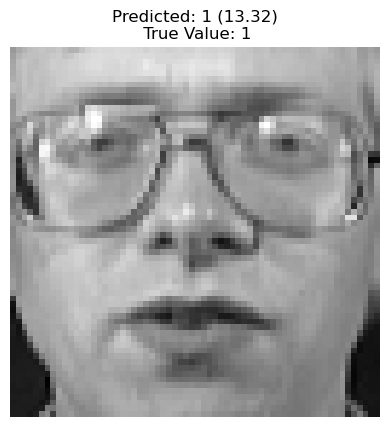

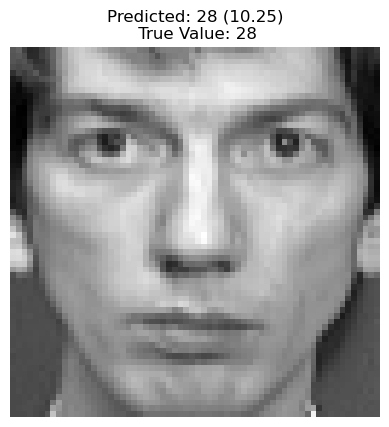

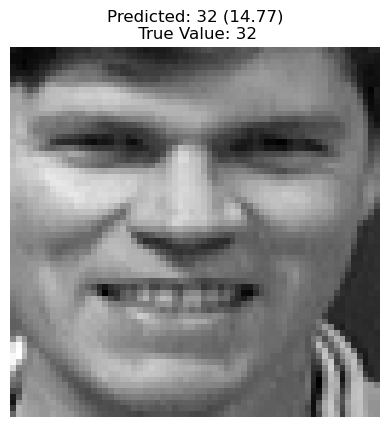

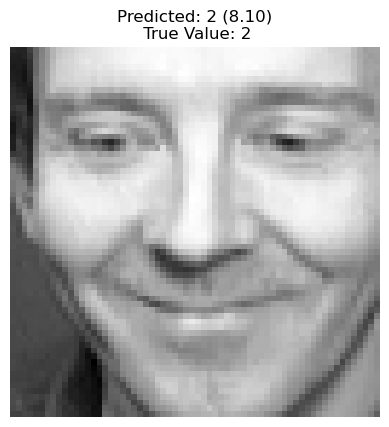

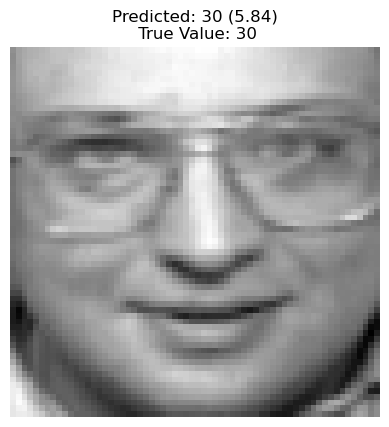

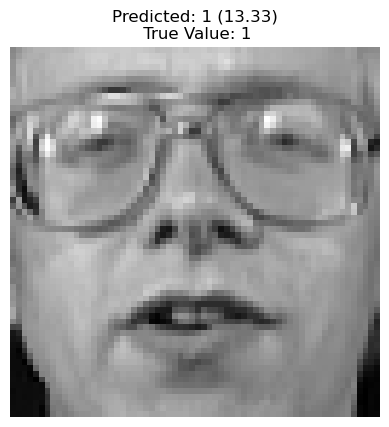

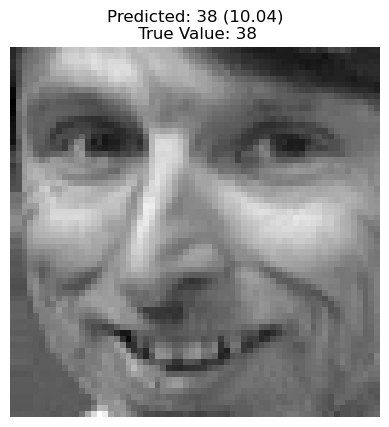

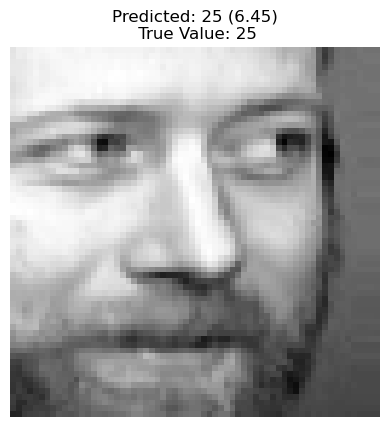

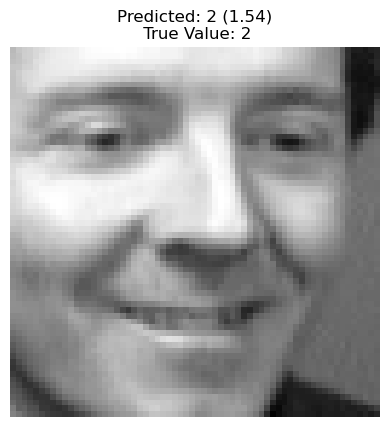

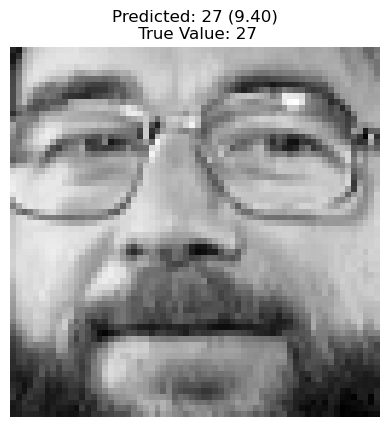

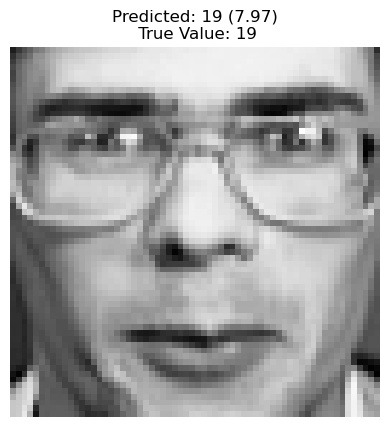

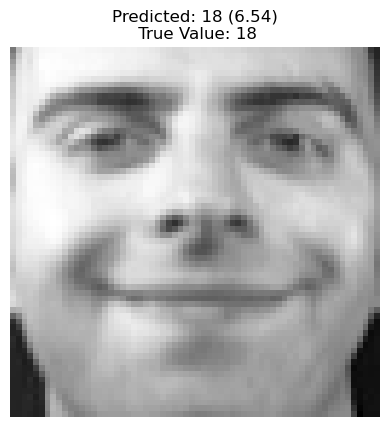

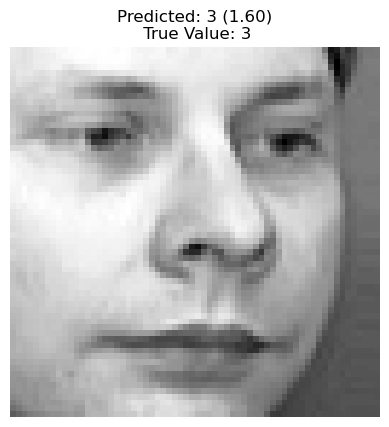

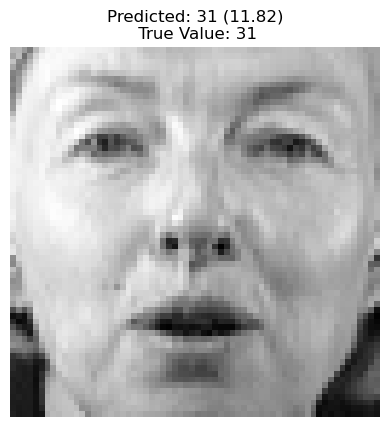

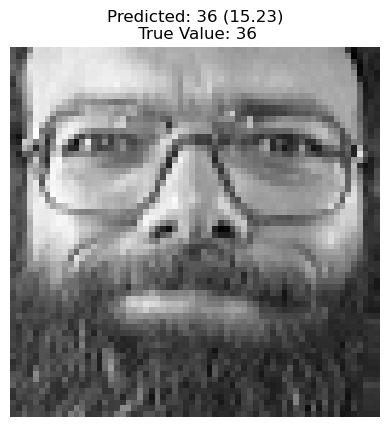

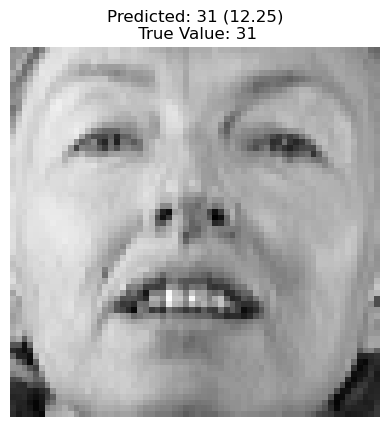

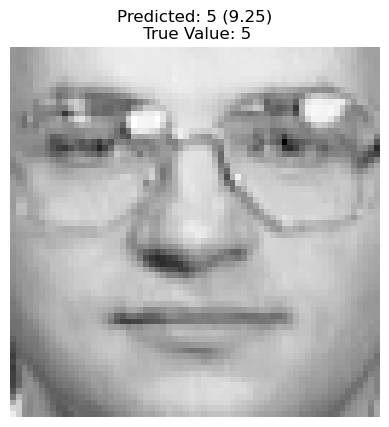

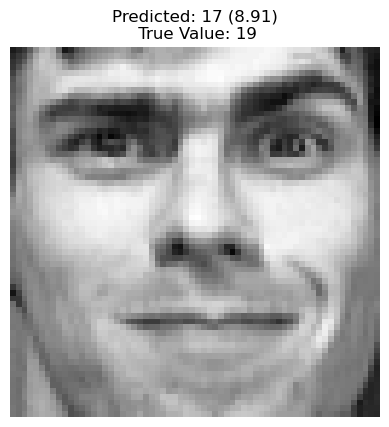

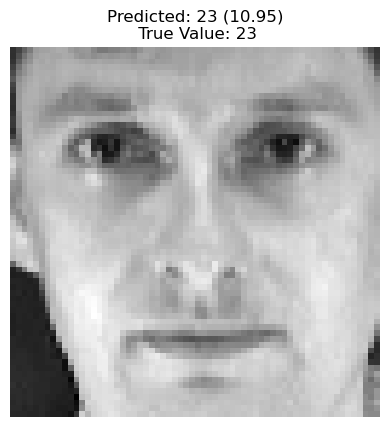

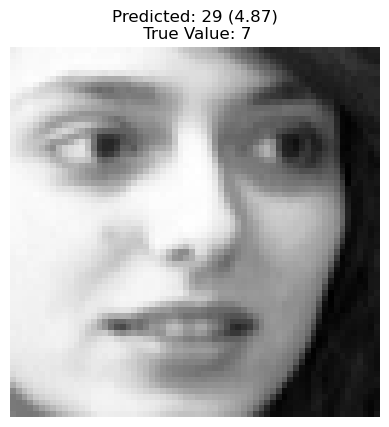

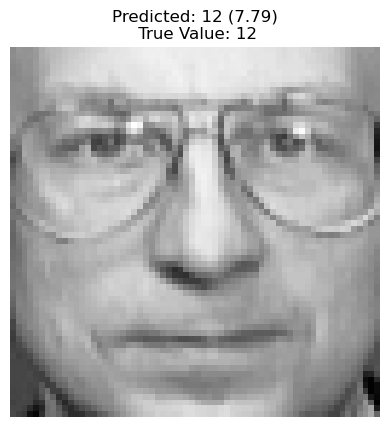

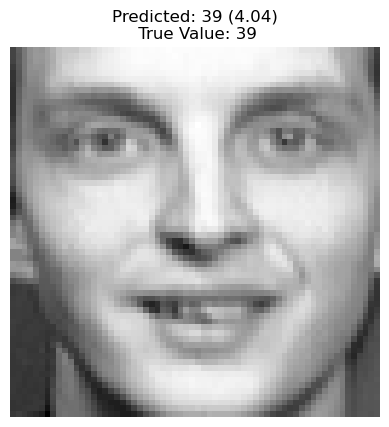

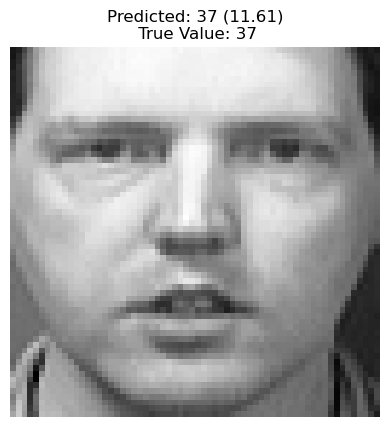

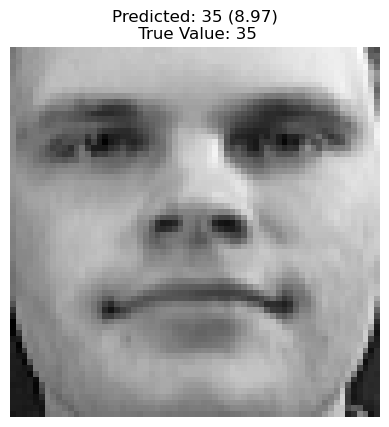

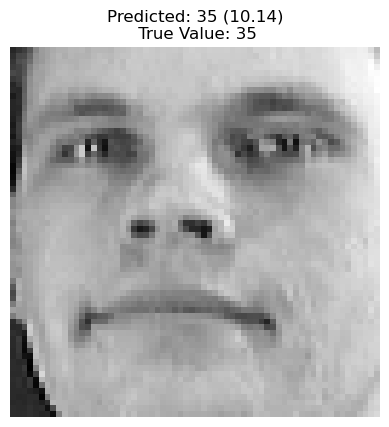

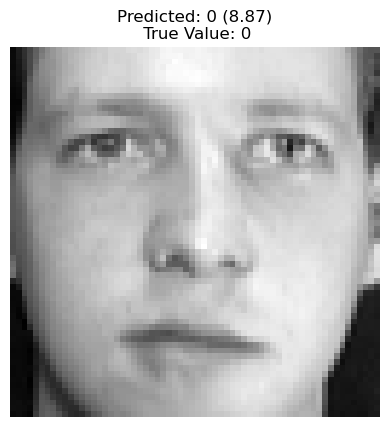

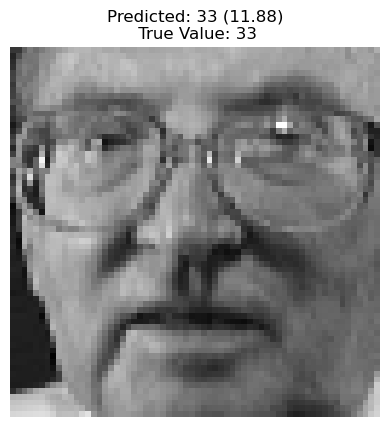

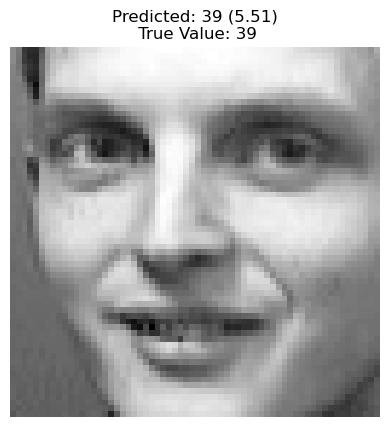

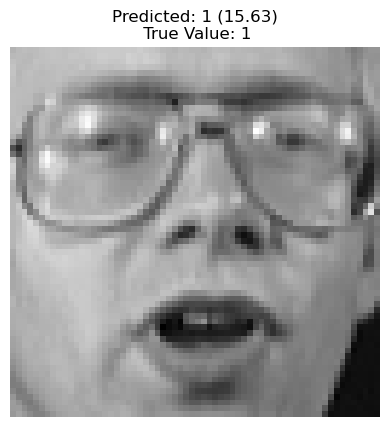

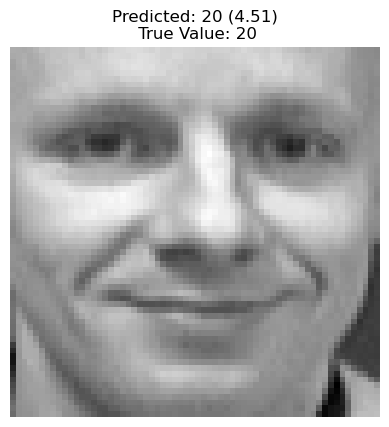

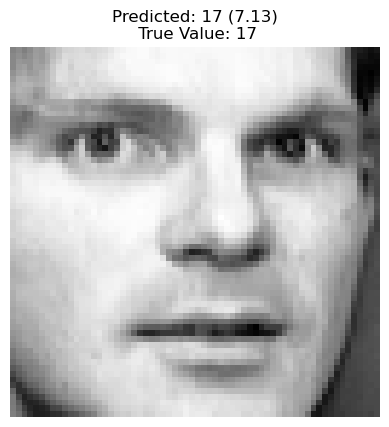

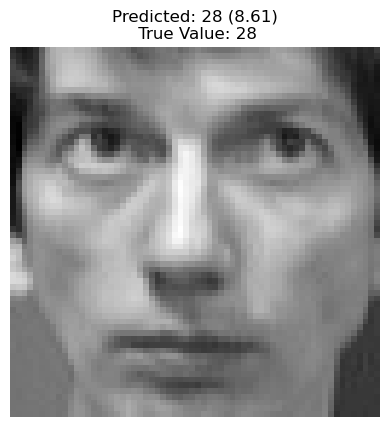

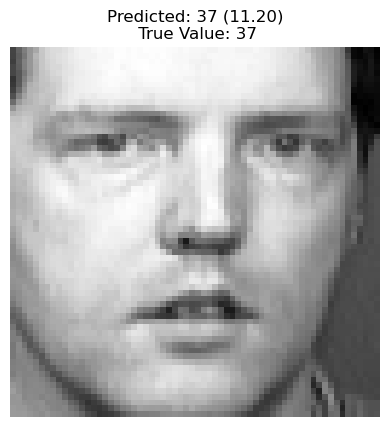

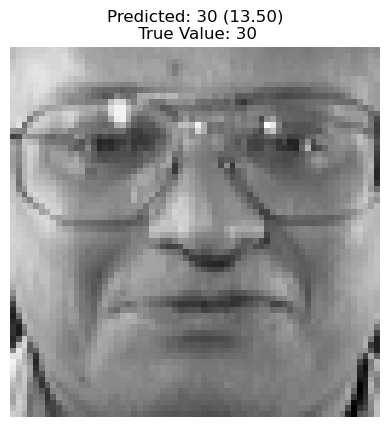

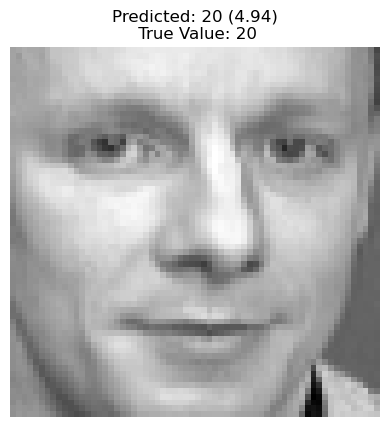

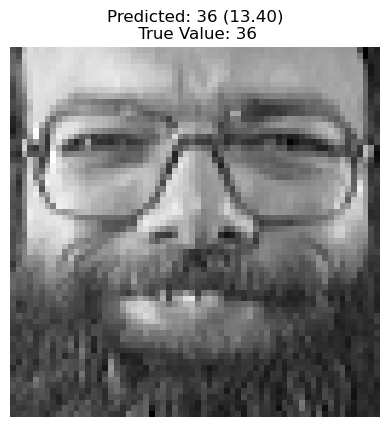

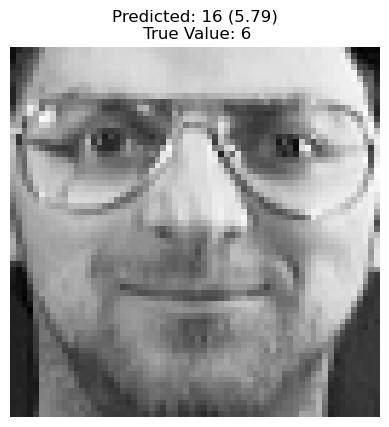

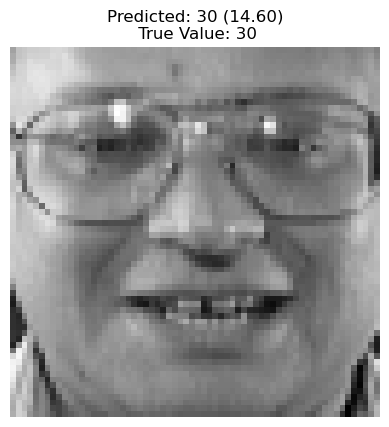

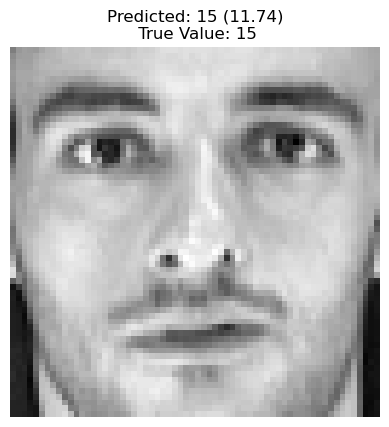

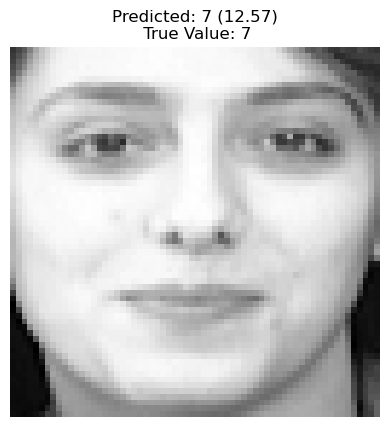

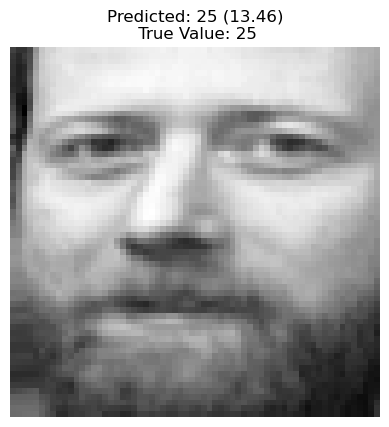

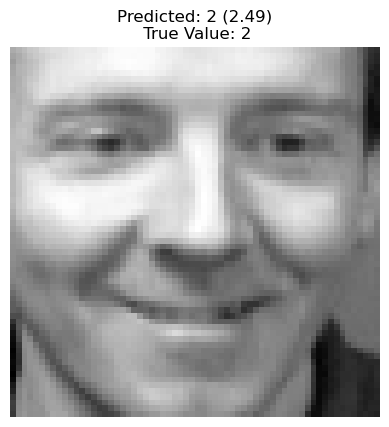

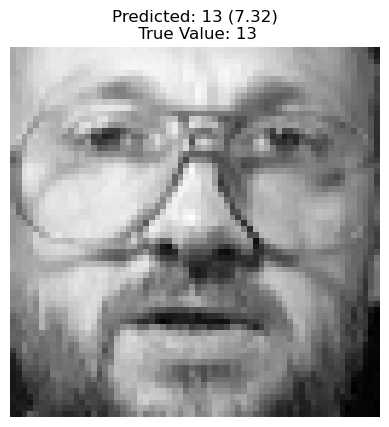

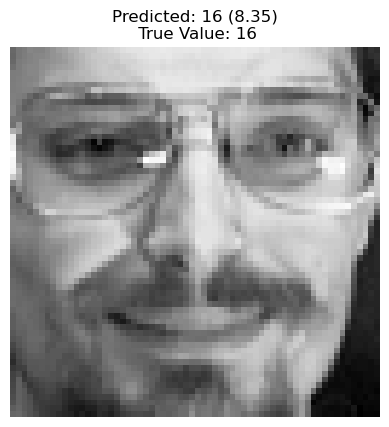

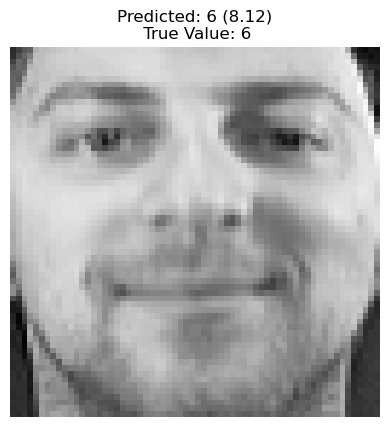

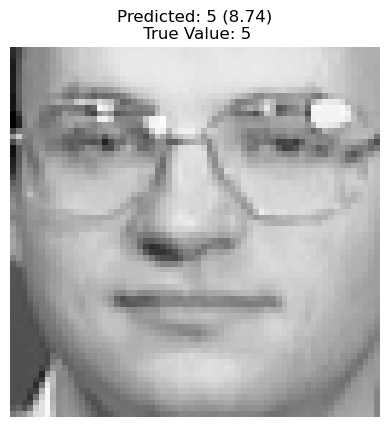

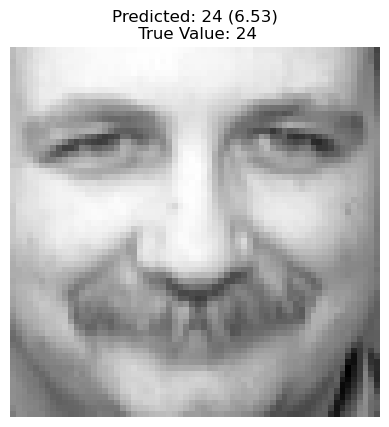

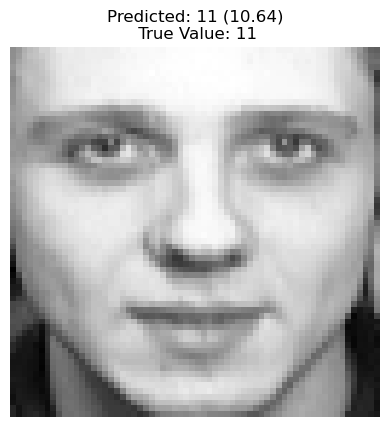

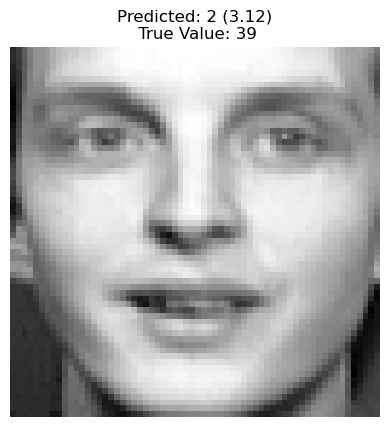

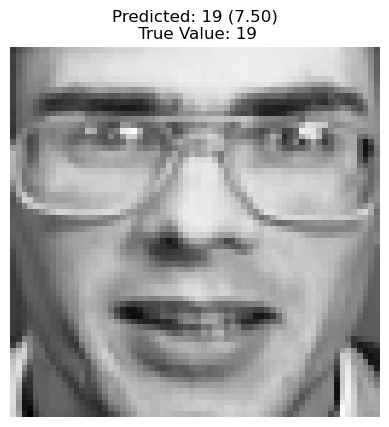

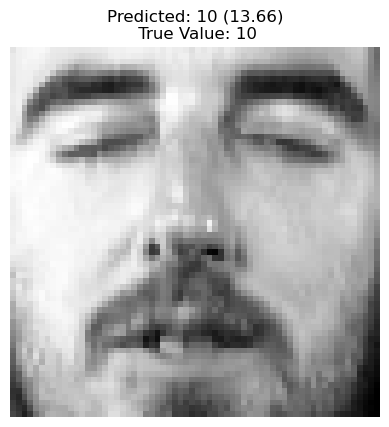

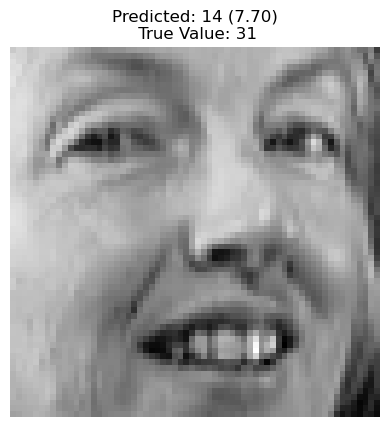

In [269]:
x_test = np.array(x_test)
y_test = np.array(y_test)

predicts = model(x_test)




for i in range(0,len(x_test)):
    predicted_class = np.argmax(predicts[i])
    confidence = np.max(predicts[i])
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})\n True Value: {y_test[i]}")
    plt.show()